# 2.2.6 Определение энергии активации по температурной зависимости вязкости жидкости

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
data = pd.read_csv('data.csv')
data['diameter'] /= 1000
data['temp'] += 273
data

,temp,diameter,time
0,300,0.00124,63.60
1,300,0.00112,79.00
2,300,0.00112,74.00
3,300,0.00118,86.10
4,300,0.00123,67.10
5,306,0.00122,51.00
6,306,0.00125,53.70
7,306,0.00125,53.41
8,306,0.00116,55.35
9,306,0.00115,60.25


## 1. $\eta$

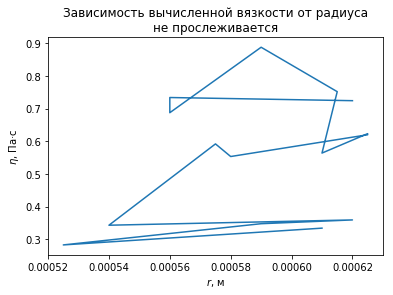

In [3]:
def v_set(time): return 0.1 / time
def rho_liq(temp): return temp.apply({273+27: 1241, 273+33: 1237, 273+40: 1231}.__getitem__)
def eta(r, temp, time): return 2/9 * 9.81 * r**2 * (2600 - rho_liq(temp)) / v_set(time)
data['eta'] = eta(data['diameter']/2, data['temp'], data['time'])
plt.plot(data['diameter']/2, data['eta'])
plt.title('Зависимость вычисленной вязкости от радиуса\nне прослеживается')
plt.xlabel('$r$, м')
plt.ylabel('$\eta$, Па·с');

## 2. $Re$, $\tau$

In [4]:
def Re(r, temp, time, eta): return v_set(time) * r * rho_liq(temp) / eta
data['Re'] = Re(data['diameter']/2, data['temp'], data['time'], data['eta'])
def tau(r, eta): return 2/9 * r**2 * 2600 / eta
data['tau'] = tau(data['diameter']/2, data['eta'])
data['S'] = data['tau'] * v_set(data['time'])

## 3. $ln \eta (1/T)$

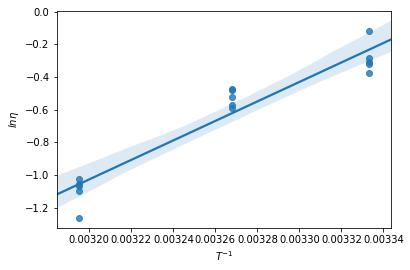

In [5]:
sns.regplot(1/data['temp'], np.log(data['eta']))
plt.xlabel('$T^{-1}$')
plt.ylabel('$ln \eta$');

Затемнённая область - 95% доверительный интервал

## 4. $W$

In [6]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(1/data['temp'], np.log(data['eta']))
W = 1.38e-23 * slope
print(f'Энергия активации: {W:.2}')

Энергия активации: 8.2e-20


## Результаты вычислений

In [7]:
data

,temp,diameter,time,eta,Re,tau,S
0,300,0.00124,63.60,0.724297,0.001670,0.000307,4.821372e-07
1,300,0.00112,79.00,0.733971,0.001199,0.000247,3.124861e-07
2,300,0.00112,74.00,0.687517,0.001366,0.000264,3.561406e-07
3,300,0.00118,86.10,0.887939,0.000958,0.000227,2.630744e-07
4,300,0.00123,67.10,0.751880,0.001513,0.000291,4.331515e-07
5,306,0.00122,51.00,0.563874,0.002624,0.000381,7.475980e-07
6,306,0.00125,53.70,0.623285,0.002310,0.000362,6.743105e-07
7,306,0.00125,53.41,0.619919,0.002335,0.000364,6.816530e-07
8,306,0.00116,55.35,0.553256,0.002343,0.000351,6.347069e-07
9,306,0.00115,60.25,0.591896,0.001995,0.000323,5.356664e-07
